## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/car data (1).csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.columns  #printing index of all the columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#dropping the car_name column
df.drop("Car_Name",axis=1,inplace=True)

In [10]:
df["Current_Year"]=2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [11]:
df["No_of_years"]=df["Current_Year"]-df["Year"]
df=df.drop(["Current_Year","Year"],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [12]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,2.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000


On an average car has been driven 36947 kilometres and max distance the car has been traveled is 5,00,000 kilometres. The car with highest showroom selling  present price in data set is 92.6 lakh. Maximum number of years car has been used and then come for sell is 17 years.maximum number of owner that has used a single car is 3.Maximum selling price for used car is 35 lakh rupees.

## EDA Analysis

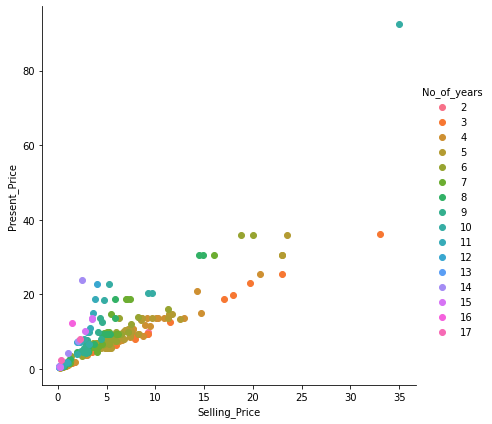

In [13]:

sns.FacetGrid(df,hue="No_of_years",height=6).map(plt.scatter,"Selling_Price","Present_Price").add_legend()
sns.set_style("darkgrid")
plt.show()

More number of Years you will use your car lesser the amount you will get.

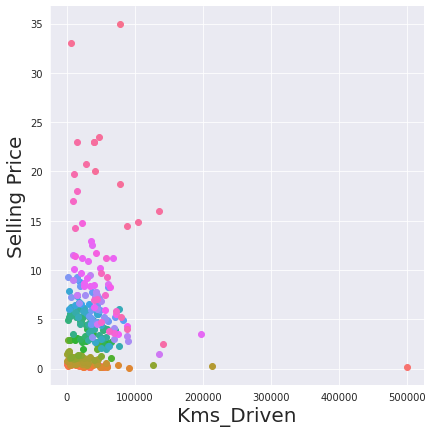

In [14]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Present_Price",height=6).map(plt.scatter,"Kms_Driven","Selling_Price")
plt.xlabel("Kms_Driven",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

Lesser the car would be driven is getting High Selling Price  and Higher will be the cost as we see the graph at max distance i e:- 500000 kilometres the car’s cost is near to Zero or we can say nobody is willing to pay any amount to those cars.

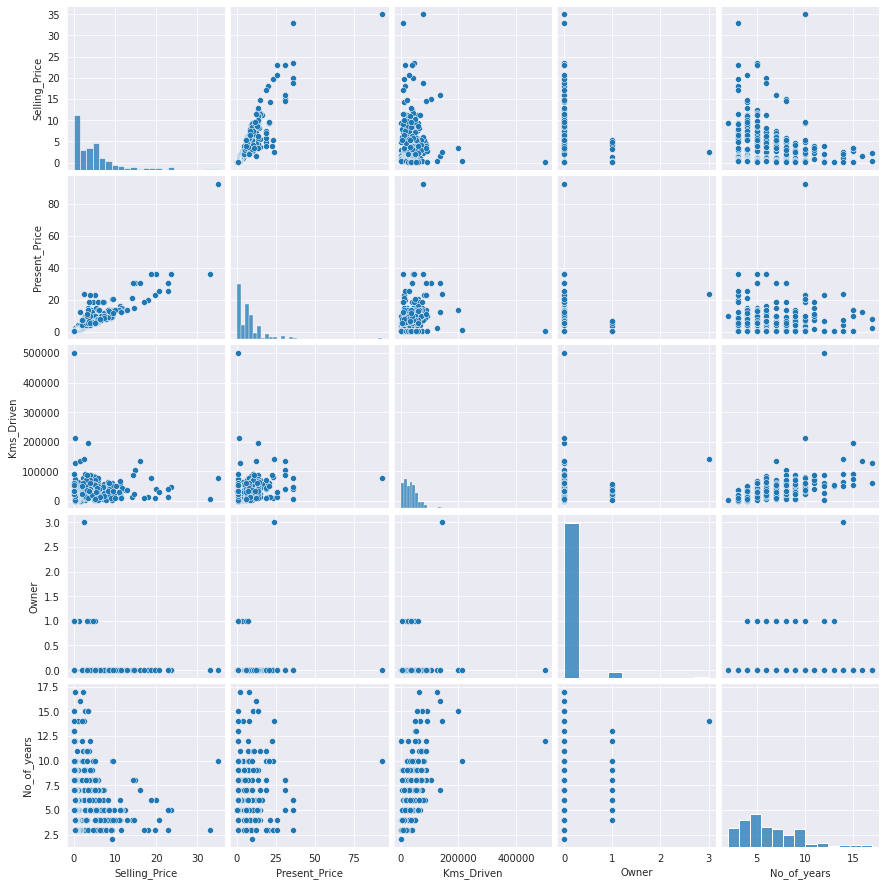

In [15]:
sns.pairplot(df)

## Univiarate Analysis

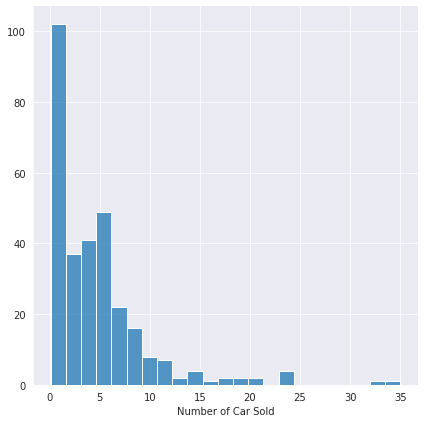

In [16]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Selling_Price")
plt.xlabel("Number of Car Sold")
plt.show()

Most number of car has been sold within a price range of 1–10 lakh and for a price range of 25 -35 lakh there are negligible car has sold

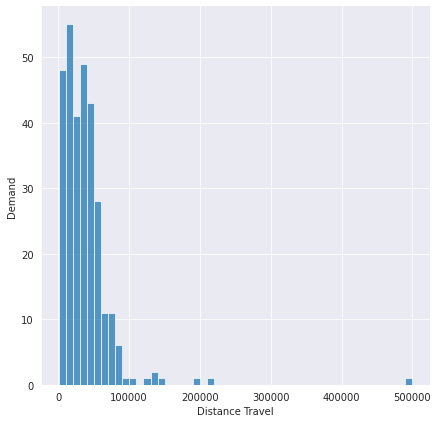

In [17]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Kms_Driven")
plt.xlabel("Distance Travel")
plt.ylabel("Demand")
plt.show()

Demand for those car that has been traveled less distance are in more demand especially if car has traveled distance within a range of 0–5000 kilometre people are more attracted towards them.

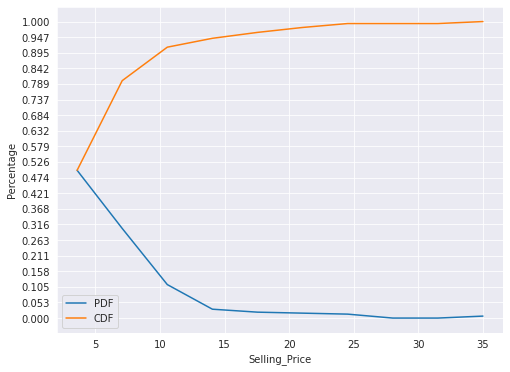

In [18]:
df_Selling_Price=df.loc[:,"Selling_Price"]
count,bin_count=np.histogram(df_Selling_Price,bins=10)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_count[1:],PDF,label="PDF")
plt.plot(bin_count[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.xlabel("Selling_Price")
plt.ylabel("Percentage")
plt.legend(loc="lower left")
plt.show()

As we can see 94.7% of cars that are on cardekho has price ≤15 lakh . So one thing is clear that if we want to purchase used car with a price range of 20–25 we won’t prefer to go to cardekho.com because there we won’t get so many options.


## Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


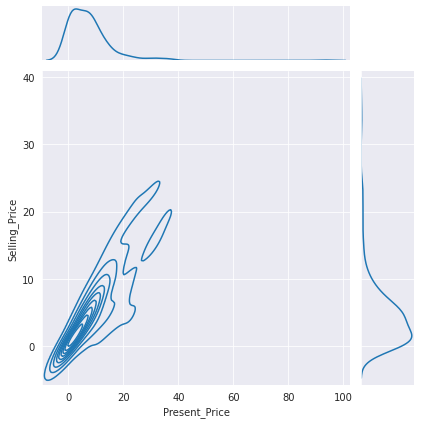

In [19]:
sns.set_style("darkgrid")
sns.jointplot("Present_Price","Selling_Price",data=df,kind="kde")
plt.show()

If we see above graph we can understand that for those vehicle whose original price lie within range of 0–20 lakh they are getting approximately 50% of their money when they sell their car after using certain period of time.

* Converted all the Features Into Numerical Variable.*




In [20]:
df2=pd.get_dummies(df,drop_first=True)
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [21]:
df2.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


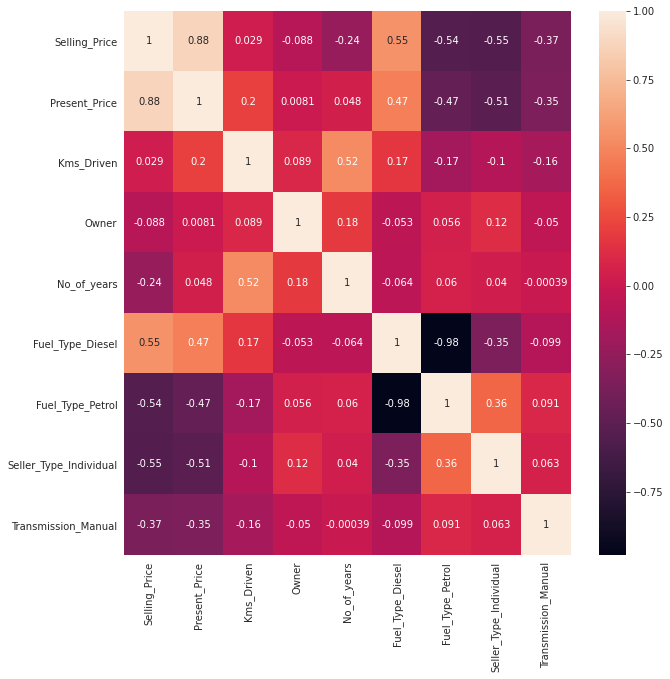

In [22]:
 plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df2.corr(),annot=True)

## Model Building

In [23]:
X=df2.drop(["Selling_Price"],axis=1)
y=df2.Selling_Price	

In [24]:
print(X.shape)
print(y.shape)



(301, 8)
(301,)


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
print(X_train.shape)
print(y_train.shape)


(240, 8)
(240,)


In [27]:
print(X_test.shape)
print(y_test.shape)

(61, 8)
(61,)


Import libraries to predict model

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics 

## Decision Tree Regressor

In [81]:
Regressor=DecisionTreeRegressor(random_state=0)

In [82]:
train_model=Regressor.fit(X_train,y_train)
train_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [83]:
# predictin on the test set
y_pred = Regressor.predict(X_test)

In [84]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred))
print("r2_score:", r2_score(y_train, train_model.predict(X_train)))


r2_score: 0.9504461837514914
r2_score: 1.0


In [85]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.637049180327869
MSE: 1.0750295081967216
RMSE: 1.0368362976847991


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


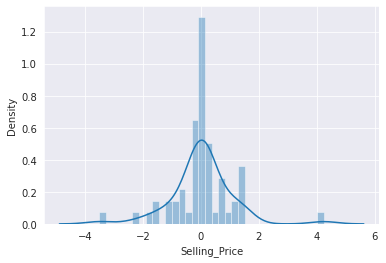

In [86]:
sns.distplot(y_test-y_pred)

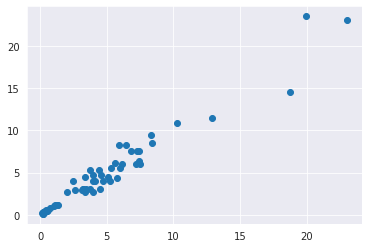

In [87]:
plt.scatter(y_test,y_pred)

In [88]:
Result=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
Result.head(10)

,Actual,Predicted
285,7.40,6.40
248,4.00,2.70
150,0.50,0.40
217,3.15,2.90
107,1.25,1.10
206,5.75,4.40
132,0.75,0.80
73,2.65,2.95
288,8.40,8.50
157,0.48,0.60


## Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
Regressor1 = RandomForestRegressor(n_estimators=100)
# Train the model using the training sets
Regressor1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
# predictin on the test set
y_pred = Regressor1.predict(X_test)

In [93]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred))

r2_score: 0.8576778020512676


In [94]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.7930278688524597
MSE: 3.0875636640983632
RMSE: 1.7571464549371982


In [95]:
Result=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
Result.head(10)

,Actual,Predicted
285,7.40,6.4860
248,4.00,2.8975
150,0.50,0.4741
217,3.15,2.9480
107,1.25,1.0612
206,5.75,5.1755
132,0.75,0.8127
73,2.65,3.0880
288,8.40,8.7955
157,0.48,0.5877


## XGBOOST Regressor

In [41]:
from xgboost import XGBRegressor

In [42]:
Regressor3 = XGBRegressor()
# Train the model using the training sets
Regressor3.fit(X_train, y_train)

[20:57:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
# predictin on the test set
y_pred = Regressor3.predict(X_test)

In [44]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred))

r2_score: 0.9361034510382013


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.6576970706220534
MSE: 1.3861833619713921
RMSE: 1.1773628845735677


## Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
Regressor4 = LinearRegression()
# Train the model using the training sets
Regressor4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# predictin on the test set
y_pred = Regressor4.predict(X_test)

In [49]:
# Calculate Model 
print("r2_score:", r2_score(y_test, y_pred))

r2_score: 0.8625260513315252


In [50]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.0998575552990957
MSE: 2.9823848618597513
RMSE: 1.726958268708237


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


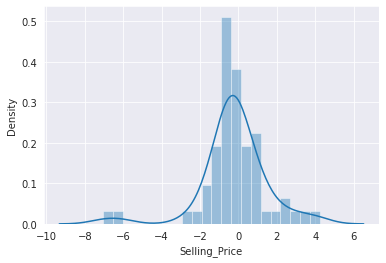

In [51]:
sns.distplot(y_test-y_pred)

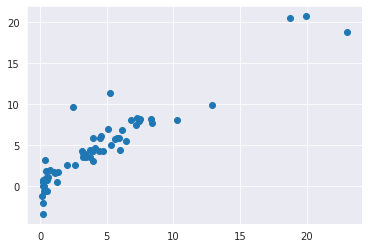

In [52]:
plt.scatter(y_test,y_pred)

## Feature Selection

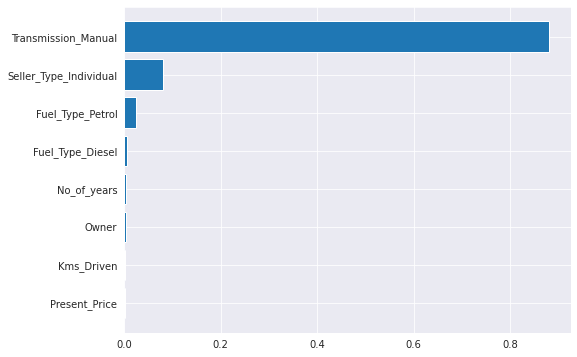

In [53]:
plt.figure(figsize=(8,6))
model=RandomForestRegressor()
model.fit(X,y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

[20:57:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


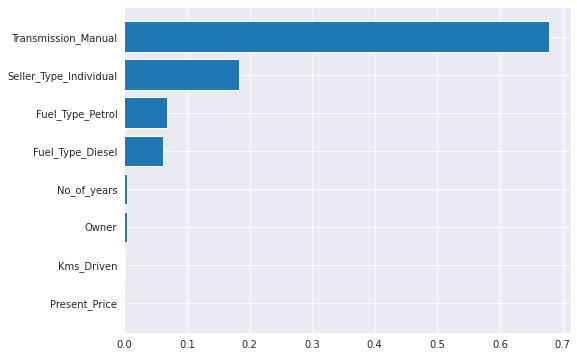

In [54]:
plt.figure(figsize=(8,6))
model=XGBRegressor()
model.fit(X,y)
importance=np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

## Conclusion

1.   Random Forest Regressor and XgBOOST Regressor gives the good accuracy than other algorithms
2.   Transmission_manual,seller_Type_individual,Fuel_Type_petrol, make the most impact to output prediction for both Regressor.

